<a href="https://colab.research.google.com/github/Prasadkurapati7/Data-Mining-/blob/main/Data_Mining_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import random

# Read Association data

In [4]:
data = []

with open("/content/drive/MyDrive/DM3/Grocery_Items_18.csv", "r") as file_:
    csv_reader = csv.reader(file_)

    next(csv_reader)

    for row in csv_reader:
        row = list(filter(lambda x: x != '', row))
        data.append(row)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 1 (c).

In [15]:
all_items = []
for row in data:
  for item in row:
    all_items.append(item)

In [16]:
len(set(all_items))

165

The Number of Unique Items is 165

In [17]:
len(data)

8000

Total Number of records in 8000

In [27]:
from collections import Counter

my_counter = Counter(all_items)

max_element = my_counter.most_common(1)[0]
print(max_element)

('whole milk', 1374)


The most popular item is 'whole milk' and 1374 transaction contain this item

# 1(d)

In [34]:
def fit_association_rules(dataset,support,confidence):
  te = TransactionEncoder()
  te_ary = te.fit(dataset).transform(dataset)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  frequent_itemsets = fpgrowth(df, min_support=support, use_colnames=True)
  rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence,num_itemsets=len(df))
  return rules


In [35]:
rules = fit_association_rules(data,0.01,0.08)

In [36]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(whole milk),0.086125,0.162875,0.010750,0.124819,0.766346,1.0,-0.003278,0.956516,-0.250165,0.045121,-0.045461,0.095410
1,(soda),(whole milk),0.098500,0.162875,0.012375,0.125635,0.771355,1.0,-0.003668,0.957409,-0.247445,0.049699,-0.044486,0.100807
2,(other vegetables),(whole milk),0.118750,0.162875,0.015625,0.131579,0.807852,1.0,-0.003716,0.963962,-0.212537,0.058741,-0.037385,0.113756
3,(whole milk),(other vegetables),0.162875,0.118750,0.015625,0.095932,0.807852,1.0,-0.003716,0.974761,-0.221261,0.058741,-0.025892,0.113756
4,(whole milk),(rolls/buns),0.162875,0.114750,0.015625,0.095932,0.836013,1.0,-0.003065,0.979186,-0.189836,0.059637,-0.021257,0.116049
5,(rolls/buns),(whole milk),0.114750,0.162875,0.015625,0.136166,0.836013,1.0,-0.003065,0.969080,-0.181388,0.059637,-0.031906,0.116049


# 1(e)

In [37]:
min_supports_values = [0.001, 0.005, 0.01]
min_confidence_values = [0.05, 0.075, 0.1]
heat_map = []
for min_confidence in min_confidence_values:
  temp = []
  for min_support in min_supports_values:
    rules = fit_association_rules(data,min_support,min_confidence)
    temp.append(len(rules))
  heat_map.append(temp)

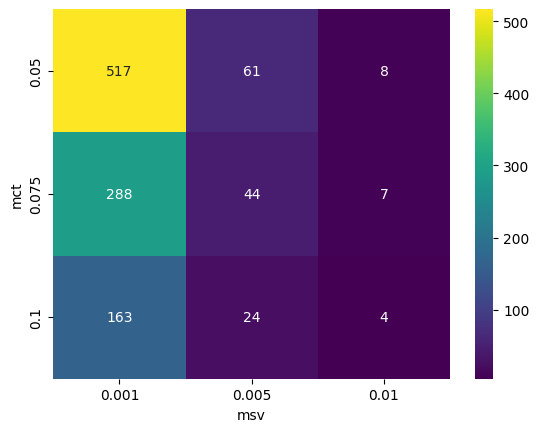

In [38]:
sns.heatmap(heat_map, annot=True,fmt='d',cmap='viridis')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=min_supports_values)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=min_confidence_values)
plt.xlabel("msv")
plt.ylabel("mct")
plt.show()

# 2 Create and compile model

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [40]:
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])



In [41]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 4)         │             292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15376)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │         123,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,568 (482.69 KB)

 Trainable params: 123,568 (482.69 KB)

 Non-trainable params: 0 (0.00 B)

# Read Image Data

In [43]:
path = "/content/drive/MyDrive/DM1/processed"

In [44]:
batch_size = 8
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=100
)

# Define the validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=100
)

Found 676 files belonging to 4 classes.
Using 541 files for training.
Found 676 files belonging to 4 classes.
Using 135 files for validation.


# Train Model

In [45]:
history = model.fit(dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.2942 - loss: 5.9003 - val_accuracy: 0.3556 - val_loss: 1.3455
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - accuracy: 0.3975 - loss: 1.2588 - val_accuracy: 0.3704 - val_loss: 1.3403
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 294ms/step - accuracy: 0.5248 - loss: 1.1361 - val_accuracy: 0.2963 - val_loss: 1.4929
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 294ms/step - accuracy: 0.6213 - loss: 0.9574 - val_accuracy: 0.3556 - val_loss: 1.5436
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 32s 468ms/step - accuracy: 0.6860 - loss: 0.8681 - val_accuracy: 0.3037 - val_loss: 1.9317
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - accuracy: 0.7470 - loss: 0.7517 - val_accuracy: 0.2815 - val_loss: 2.8087
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 313ms/step - accuracy: 0.7758 - loss: 0.6101 - val_accuracy: 0.3037 - val_loss: 3.1676
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 39s 278ms/step - accuracy: 0.8031 - loss: 0.6463 - val_accurac

# 2 (a)

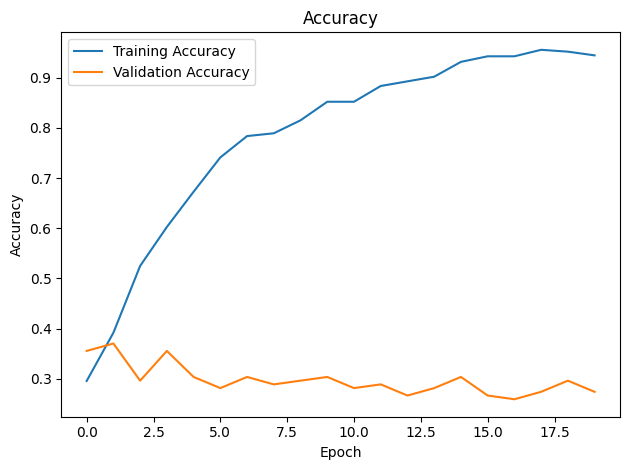

In [46]:

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']


plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# 2 (b). Experiment with nodes changes to 4 and 16

In [47]:
new_model1 = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(4, activation='relu'),
    Dense(4, activation='softmax')
])



new_model2 = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])






# Compile new models

In [48]:
new_model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])
new_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [49]:
new_model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 254, 254, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 4)         │             292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 15376)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │          61,508 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,044 (242.36 KB)

 Trainable params: 62,044 (242.36 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
new_model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 4)         │             292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 15376)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │         246,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,616 (963.34 KB)

 Trainable params: 246,616 (963.34 KB)

 Non-trainable params: 0 (0.00 B)

# Train new model 1

In [53]:
new_history1 = new_model1.fit(dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - accuracy: 0.2653 - loss: 83.2286 - val_accuracy: 0.3111 - val_loss: 1.3864
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 23s 332ms/step - accuracy: 0.2561 - loss: 1.3859 - val_accuracy: 0.3111 - val_loss: 1.3863
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 48s 443ms/step - accuracy: 0.2644 - loss: 1.3846 - val_accuracy: 0.2519 - val_loss: 1.3863
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 30s 284ms/step - accuracy: 0.2422 - loss: 1.3849 - val_accuracy: 0.3111 - val_loss: 1.3861
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - accuracy: 0.2627 - loss: 1.3831 - val_accuracy: 0.3111 - val_loss: 1.3862
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 275ms/step - accuracy: 0.2502 - loss: 1.3844 - val_accuracy: 0.2519 - val_loss: 1.3863
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 291ms/step - accuracy: 0.2952 - loss: 1.3831 - val_accuracy: 0.2519 - val_loss: 1.3861
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 278ms/step - accuracy: 0.2728 - loss: 1.3831 - val_acc

# Train New Model 2

In [51]:
new_history2 = new_model2.fit(dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 25s 349ms/step - accuracy: 0.2329 - loss: 78.3419 - val_accuracy: 0.3111 - val_loss: 1.3862
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - accuracy: 0.2733 - loss: 1.3860 - val_accuracy: 0.2519 - val_loss: 1.3861
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step - accuracy: 0.2799 - loss: 1.3854 - val_accuracy: 0.2519 - val_loss: 1.3861
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 307ms/step - accuracy: 0.2897 - loss: 1.3845 - val_accuracy: 0.2519 - val_loss: 1.3859
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - accuracy: 0.2840 - loss: 1.3840 - val_accuracy: 0.2519 - val_loss: 1.3860
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - accuracy: 0.2854 - loss: 1.3825 - val_accuracy: 0.2519 - val_loss: 1.3858
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 23s 312ms/step - accuracy: 0.2812 - loss: 1.3837 - val_accuracy: 0.2519 - val_loss: 1.3860
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 22s 313ms/step - accuracy: 0.3022 - loss: 1.3827 - val_acc

# 2 (c)

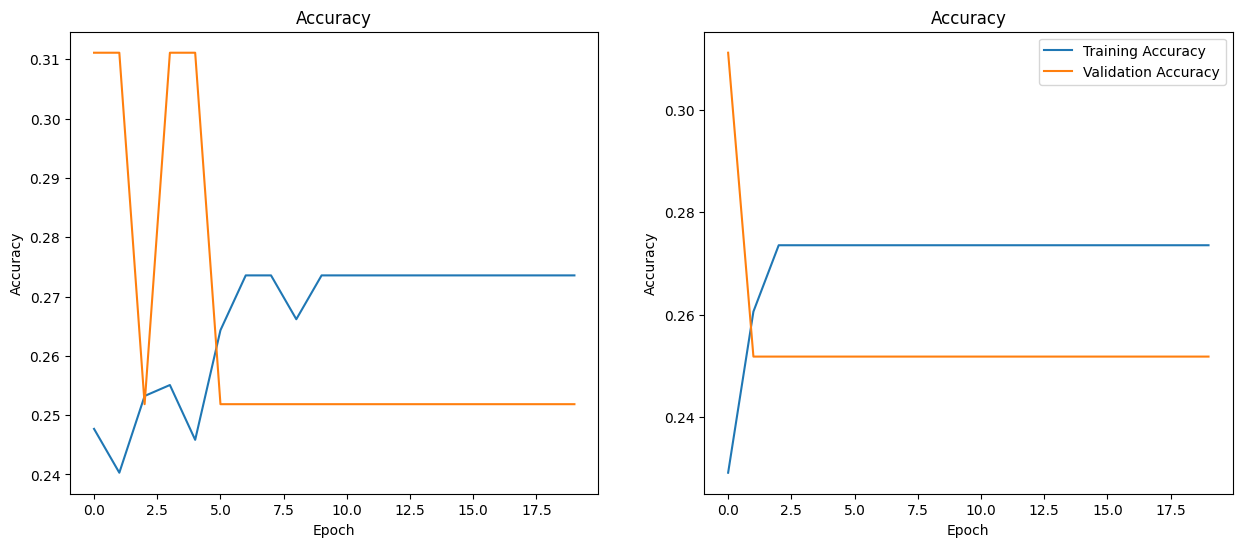

In [54]:

training_accuracy1 = new_history1.history['accuracy']
validation_accuracy1 = new_history1.history['val_accuracy']

training_accuracy2 = new_history2.history['accuracy']
validation_accuracy2 = new_history2.history['val_accuracy']

fig,axes = plt.subplots(1,2,figsize=(15,6))
axes[0].plot(training_accuracy1, label='Training Accuracy')
axes[0].plot(validation_accuracy1, label='Validation Accuracy')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

axes[1].plot(training_accuracy2, label='Training Accuracy')
axes[1].plot(validation_accuracy2, label='Validation Accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
plt.legend()

plt.show()


# 2 (d)

1. The initial model appears to suffer from overfitting. While the training accuracy increased to 94%, the validation accuracy remained below 25%.




2. In the  experiment model 1 and model 2 suffers from undefitting , as persistently low  accuracies across both training and validation sets.

# 3

In [5]:
import json

In [6]:
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = [json.loads(line) for line in f]
    return data

In [9]:
train_data = load_data("/content/drive/MyDrive/DM1/student_18/train.json")
val_data = load_data("/content/drive/MyDrive/DM1/student_18/validation.json")
test_data = load_data("/content/drive/MyDrive/DM1/student_18/test.json")


In [10]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [11]:
from datasets import Dataset, DatasetDict
dataset = DatasetDict({
    "train": Dataset.from_list(train_data),
    "validation": Dataset.from_list(val_data),
    "test": Dataset.from_list(test_data)
})

dataset.save_to_disk("sem_eval_dataset")


Saving the dataset (0/1 shards):   0%|          | 0/3000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/400 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1500 [00:00<?, ? examples/s]

In [12]:
labels = [label for label in dataset['train'].features.keys() if label not in ['ID', 'Tweet']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness',
 'surprise',
 'trust']

In [13]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_data(examples):
  # take a batch of texts
  text = examples["Tweet"]
  # encode them
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
  # add labels
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(text), len(labels)))
  # fill numpy array
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()

  return encoding

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [14]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [15]:
encoded_dataset.set_format("torch")

In [16]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased",
                                                           problem_type="multi_label_classification",
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
batch_size = 8
metric_name = "f1"

In [18]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"bert-finetuned-sem_eval-english",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

In [19]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch

def multi_label_metrics(predictions, labels, threshold=0.5):
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        labels=p.label_ids)
    return result

In [20]:
outputs = model(input_ids=encoded_dataset['train']['input_ids'][0].unsqueeze(0), labels=encoded_dataset['train'][0]['labels'].unsqueeze(0))
outputs

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


SequenceClassifierOutput(loss=tensor(0.7830, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[ 0.0271, -0.1066,  0.6738,  0.2208, -0.4070, -0.1790,  0.3230,  0.8616,
          0.3648, -0.2433,  0.0655]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [32]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [33]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,No log,0.329298,0.664685,0.767454,0.257500
2,0.227500,0.325104,0.688990,0.787803,0.275000
3,0.182200,0.339555,0.691969,0.794319,0.242500
4,0.157200,0.334679,0.689459,0.787488,0.265000
5,0.157200,0.341085,0.692049,0.791642,0.267500


TrainOutput(global_step=1875, training_loss=0.17874562174479167, metrics={'train_runtime': 427.4021, 'train_samples_per_second': 35.096, 'train_steps_per_second': 4.387, 'total_flos': 986746187520000.0, 'train_loss': 0.17874562174479167, 'epoch': 5.0})

In [34]:
test_results = trainer.evaluate(encoded_dataset["test"])
print("Test Results:", test_results)


Test Results: {'eval_loss': 0.3292900323867798, 'eval_f1': 0.6892234312118051, 'eval_roc_auc': 0.7896418107110971, 'eval_accuracy': 0.26, 'eval_runtime': 10.4092, 'eval_samples_per_second': 144.103, 'eval_steps_per_second': 18.061, 'epoch': 5.0}


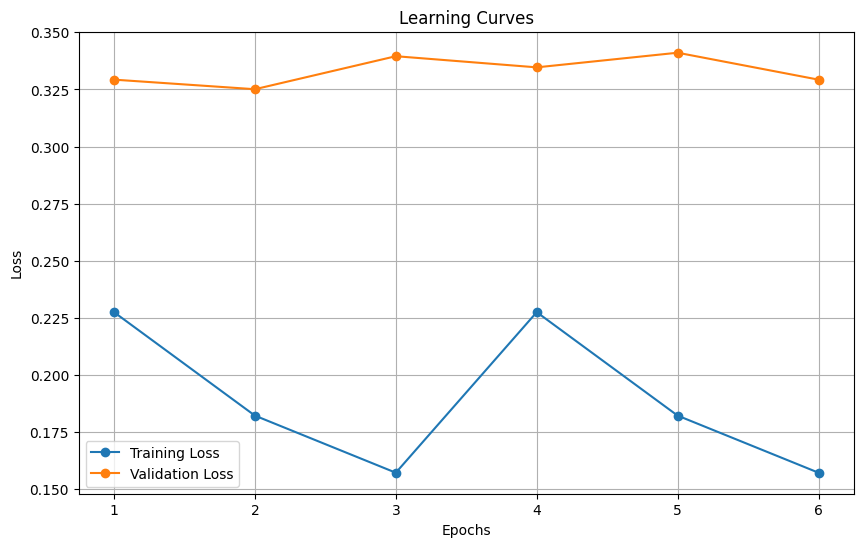

In [41]:
train_losses = [log["loss"] for log in trainer.state.log_history if "loss" in log]*2
val_losses = [log["eval_loss"] for log in trainer.state.log_history if "eval_loss" in log]

epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label="Training Loss", marker="o")
plt.plot(epochs, val_losses, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curves")
plt.legend()
plt.grid()
plt.show()

In [60]:
from sklearn.metrics import accuracy_score
import numpy as np

predictions = trainer.predict(encoded_dataset["test"])
preds_logits = predictions.predictions
true_labels = predictions.label_ids

sigmoid = torch.nn.Sigmoid()
probs = sigmoid(torch.Tensor(preds_logits)).numpy()

threshold = 0.5
binary_preds = (probs >= threshold).astype(int)

def exact_match_accuracy(predictions, labels):
    return np.mean(np.all(predictions == labels, axis=1))

def at_least_one_match_accuracy(predictions, labels):
  acc=0
  for i,j in zip(binary_preds,true_labels):
    for(a,b) in zip(i,j):
      if((a==b) and a == 1):
        acc +=1
        break
  return acc/len(predictions)

exact_match_acc = exact_match_accuracy(binary_preds, true_labels)
at_least_one_match_acc = at_least_one_match_accuracy(binary_preds, true_labels)

print(f"Exact Match Accuracy: {exact_match_acc * 100:.2f}%")
print(f"At Least One Match Accuracy: {at_least_one_match_acc * 100:.2f}%")


Exact Match Accuracy: 26.00%
At Least One Match Accuracy: 88.40%
